In [22]:
import numpy as np
import matplotlib.pyplot as plt
import ml_insights as mli

In [6]:
DATASETS = ["webkb"]
CLFS = ["kpr", "ktr", "lpr", "ltr", "sfr", "stmk", "xfr", "xpr", "xtr",
            "kfr", "ktmk", "lfr", "ltmk", "spr", "str", "xlnet_rep", "xtmk", "rep_bert"]
DATA_DIR = "/home/welton/data"

In [60]:
d_probas = {}
for dset in DATASETS:
    d_probas[dset] = {}
    for clf in CLFS:
        lprobas = []
        for fold in np.arange(10):
            probs_path = f"{DATA_DIR}/clfs_output/split_10/{dset}/10_folds/{clf}/{fold}/test.npz"
            lprobas.append(np.load(probs_path)["X_test"])
        d_probas[dset][clf] = np.vstack(lprobas)

In [61]:
labels = {}
for dataset in DATASETS:
    y_folds = []
    for fold in np.arange(10):
        y_folds.append(np.load(f"{DATA_DIR}/datasets/labels/split_10/{dataset}/{fold}/test.npy"))
    labels[dataset] = np.hstack(y_folds)

In [62]:
def get_predicted_classes_proba(probas: np.ndarray):
    preds = probas.argmax(axis=1)
    return [ probas[idx][preds[idx]] for idx in np.arange(probas.shape[0]) ]

def plot_diagram(d_probas, dataset, clf):
    plt.figure(figsize=(16, 16))
    n_labels = d_probas[dataset][clf].shape[1]
    for label in np.arange(n_labels):
        plt.subplot(3, 3, label+1)
        rd = mli.plot_reliability_diagram((labels[dataset] == label).astype(int), d_probas[dataset][clf][:, label])

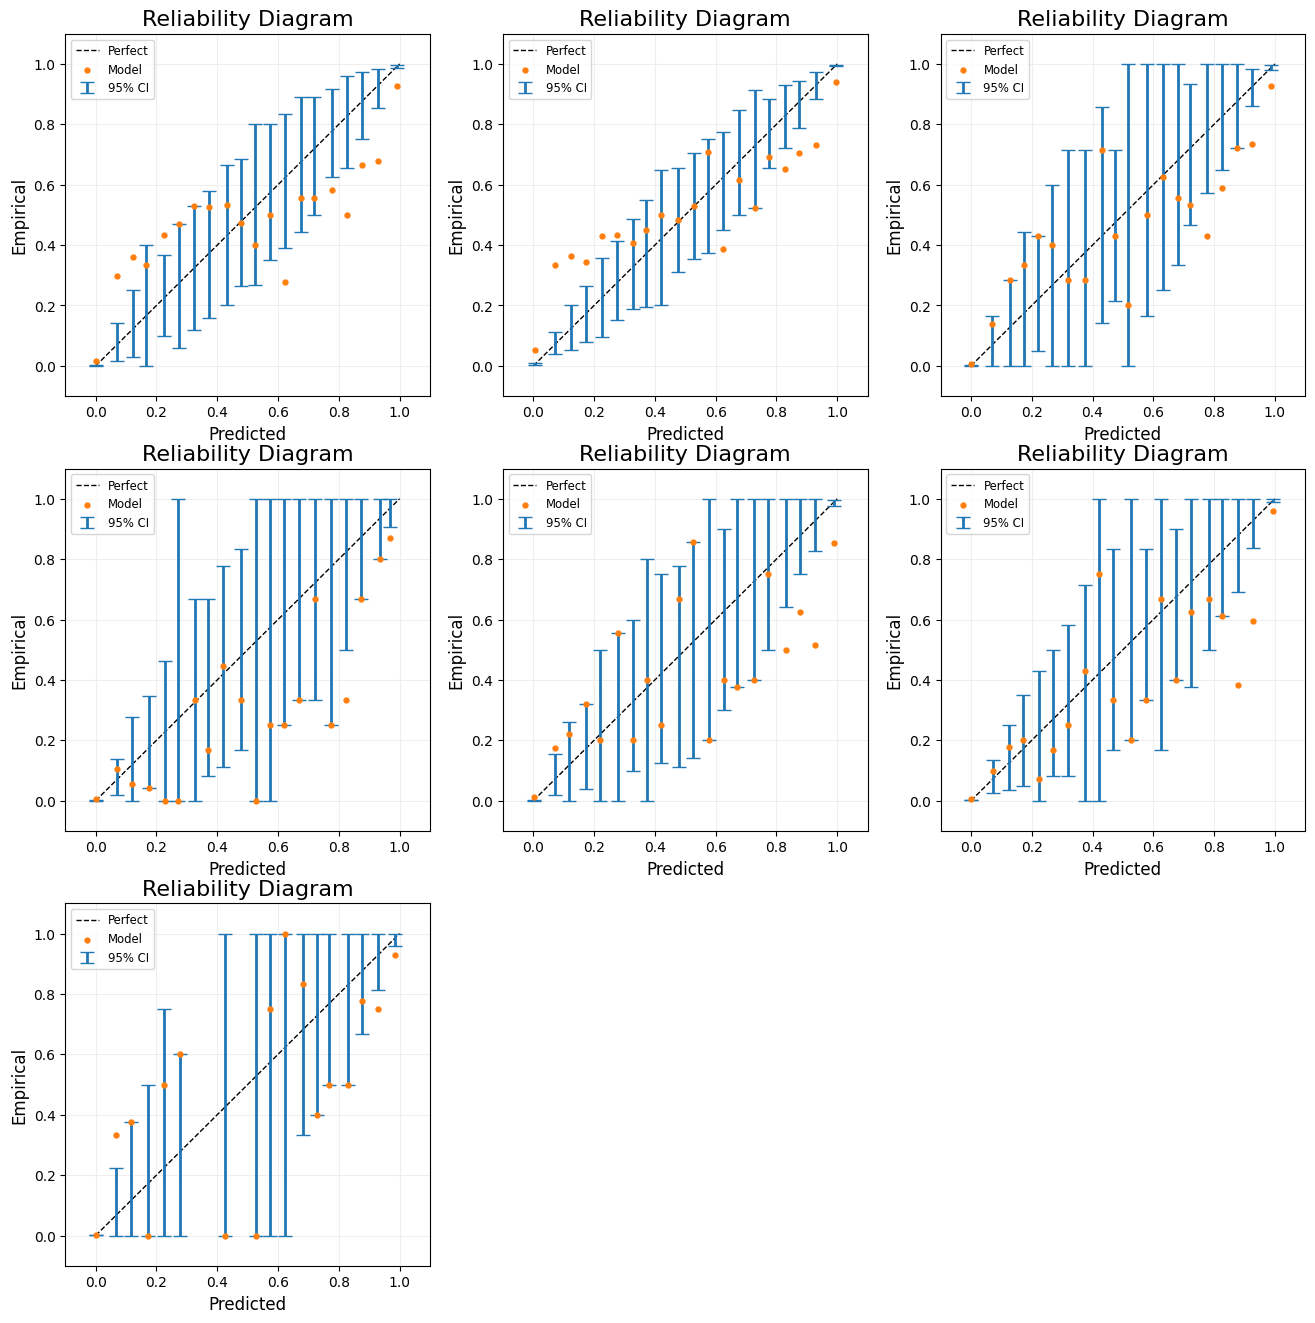

In [63]:
plot_diagram(d_probas, "webkb", "rep_bert")

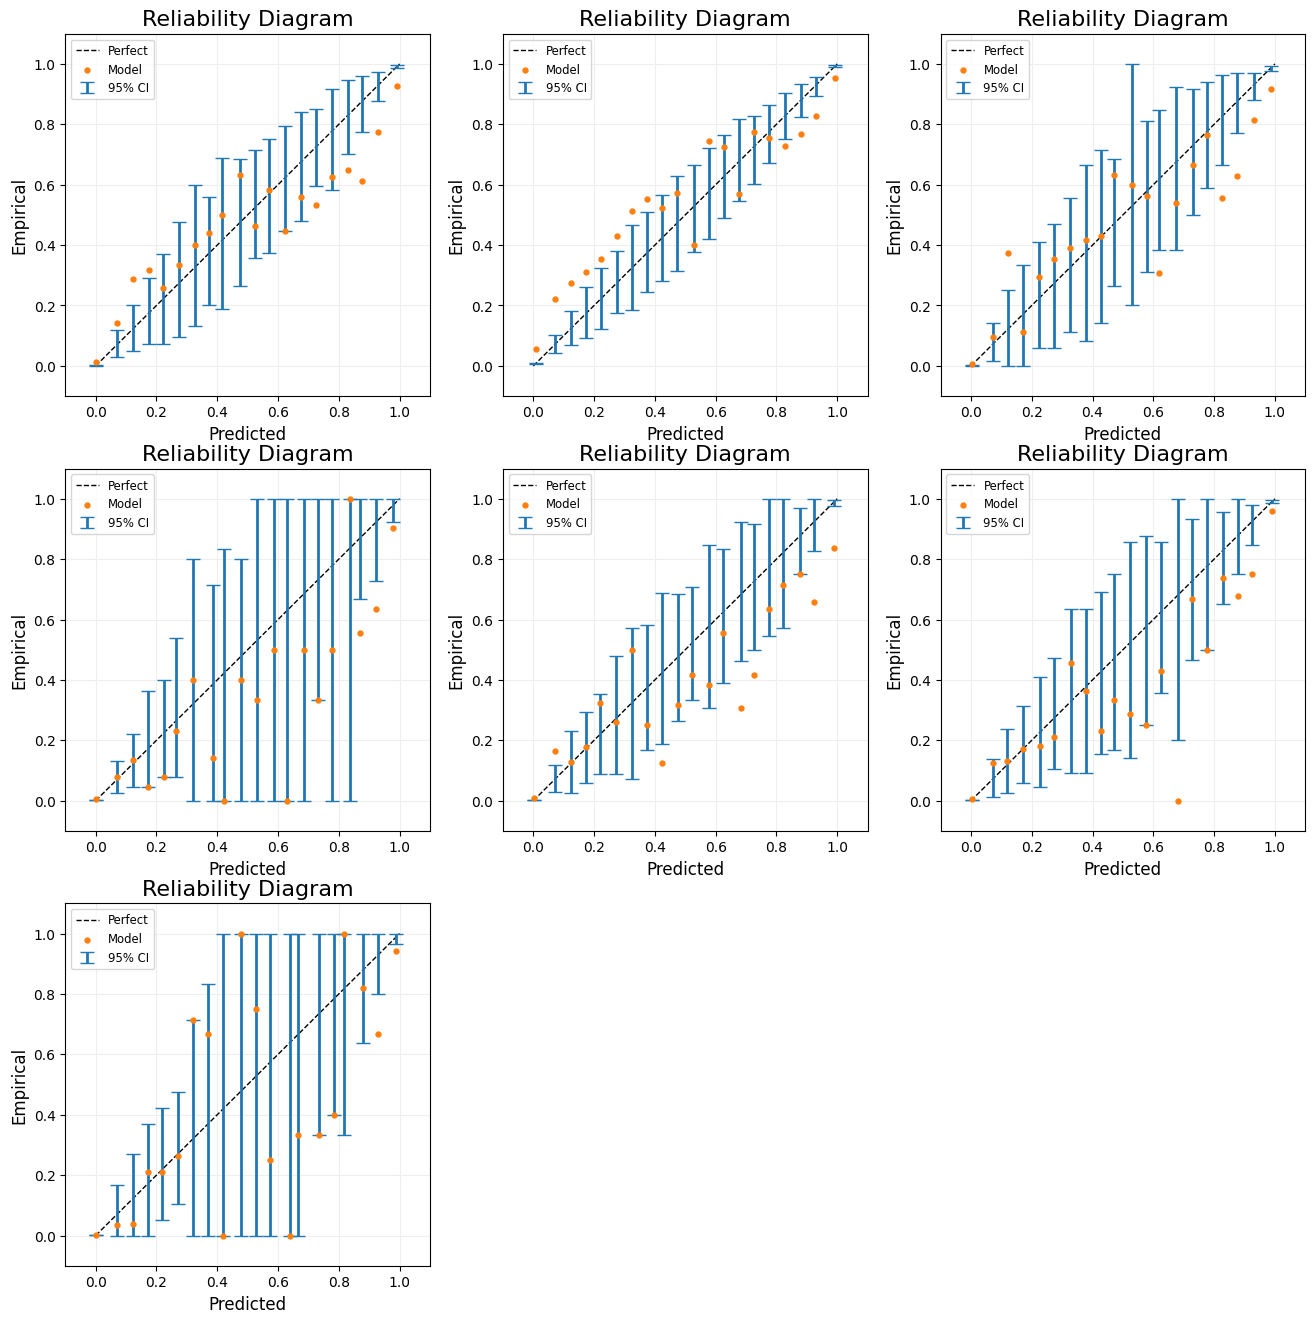

In [64]:
plot_diagram(d_probas, "webkb", "xlnet_rep")

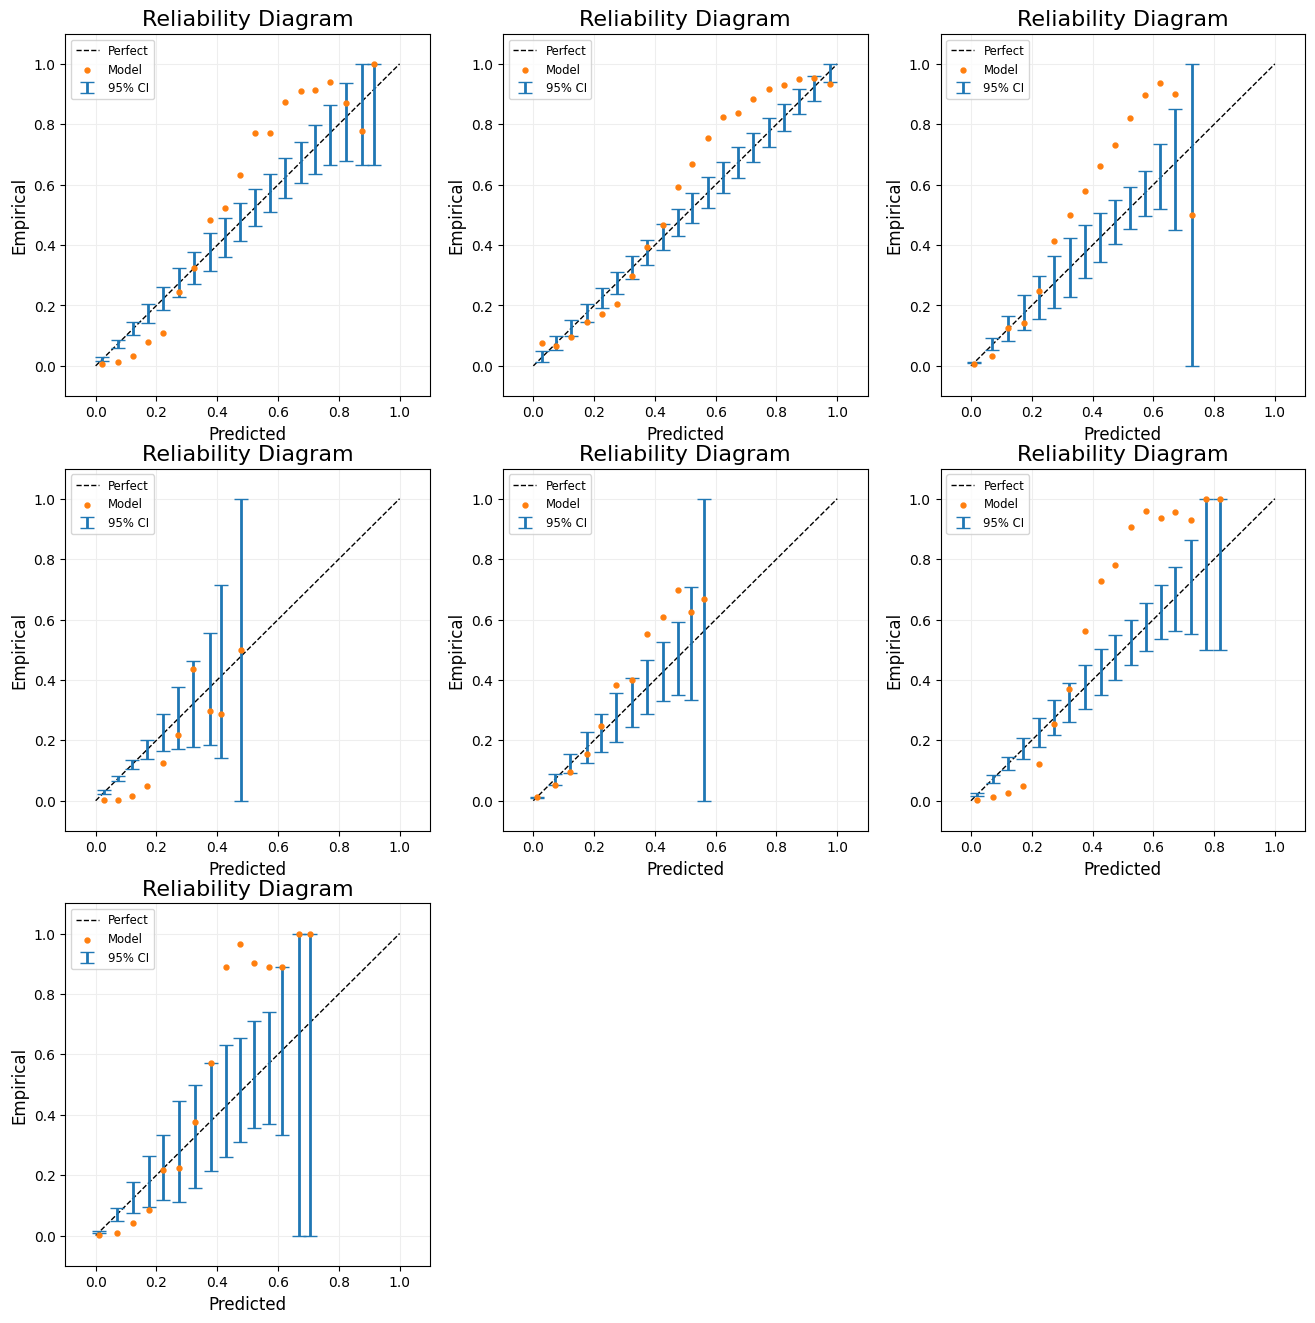

In [46]:
plot_diagram(d_probas, "webkb", "sfr")

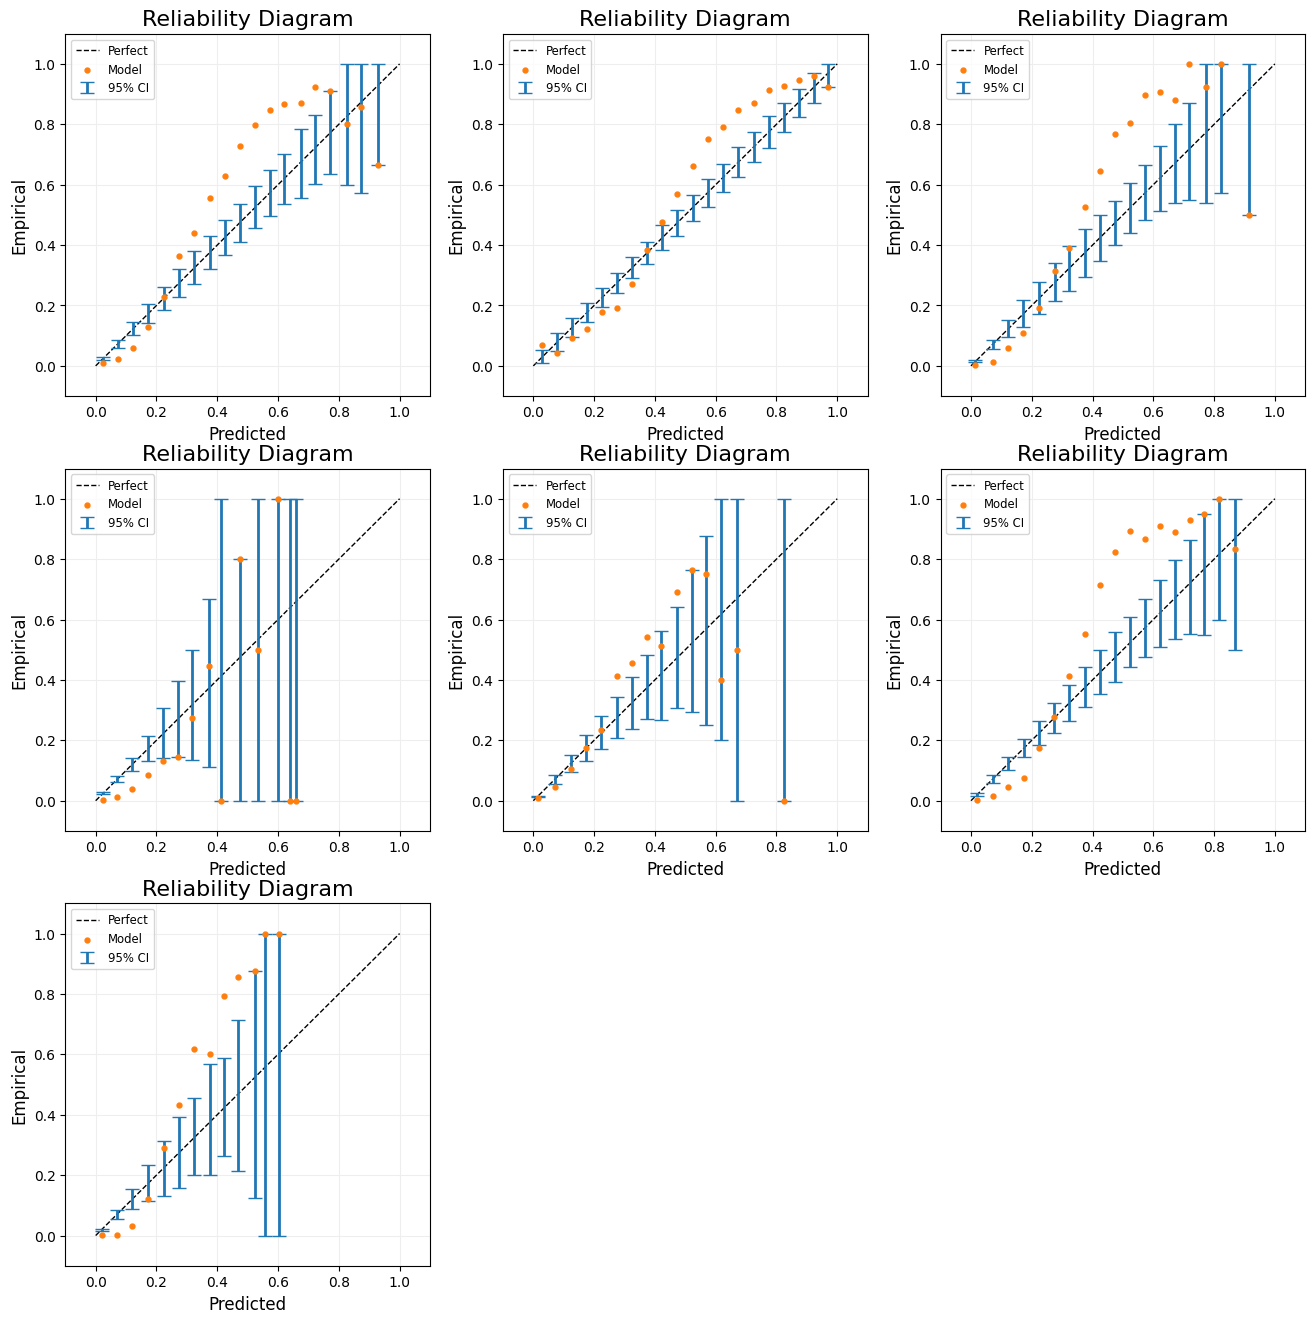

In [47]:
plot_diagram(d_probas, "webkb", "spr")

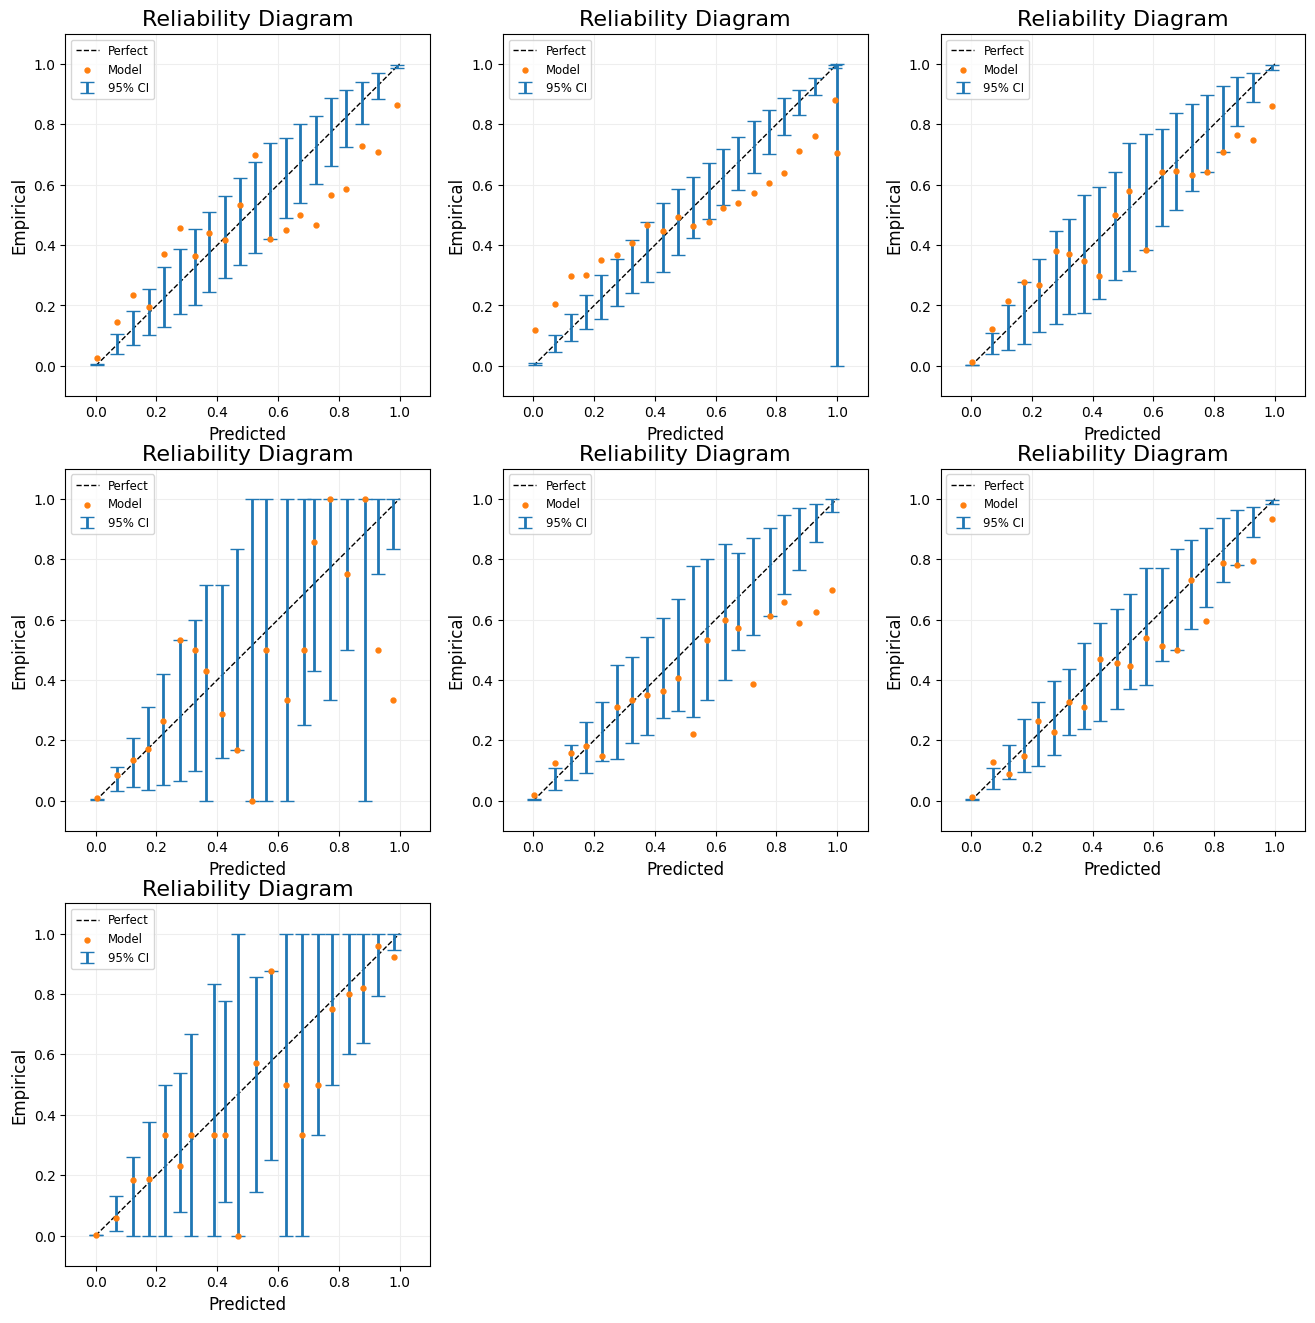

In [48]:
plot_diagram(d_probas, "webkb", "lfr")

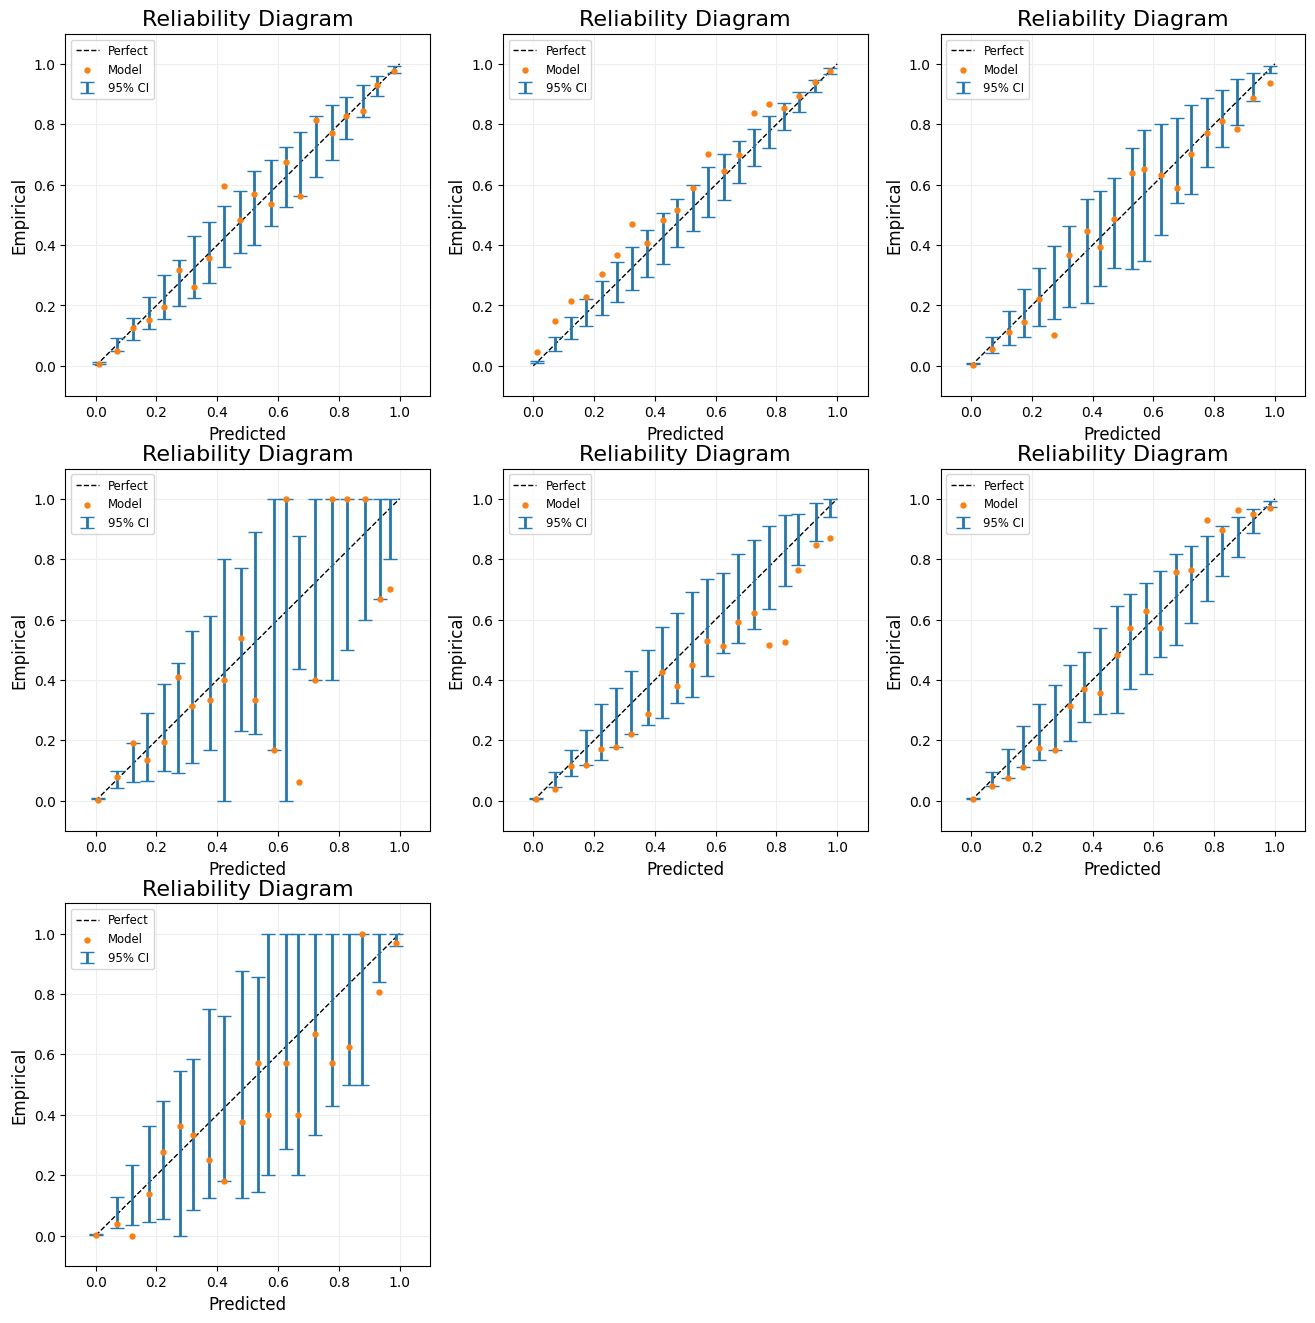

In [49]:
plot_diagram(d_probas, "webkb", "ltr")

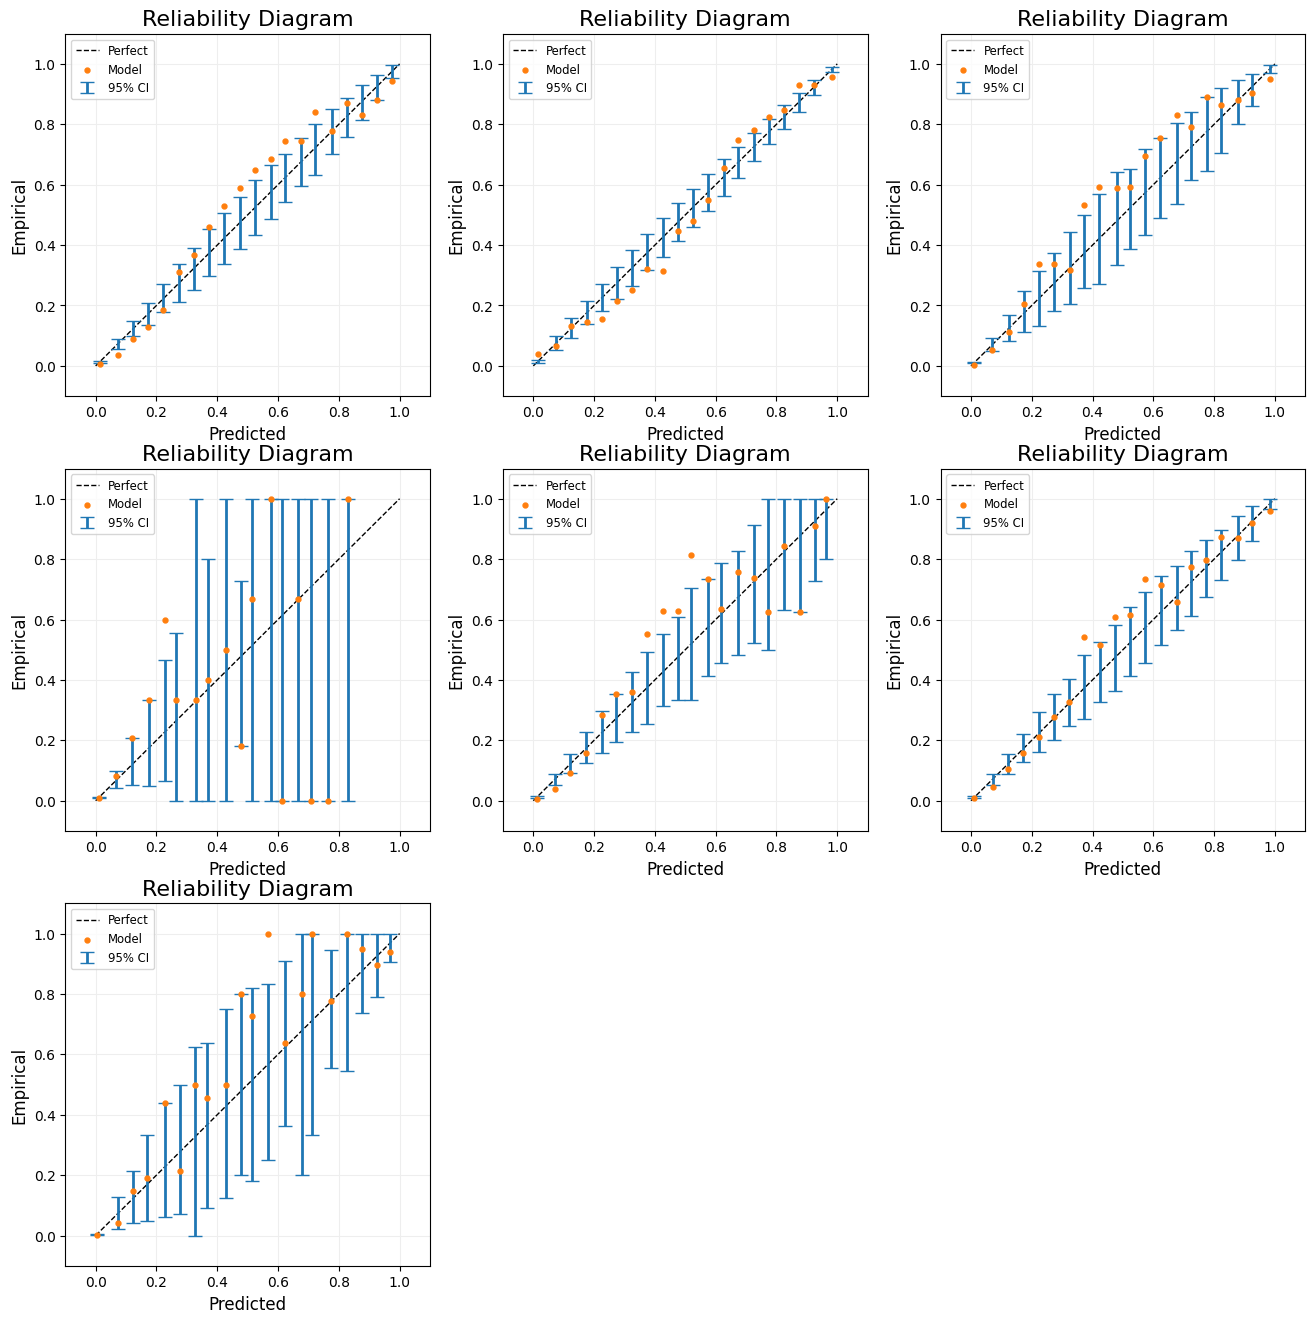

In [50]:
plot_diagram(d_probas, "webkb", "ltmk")

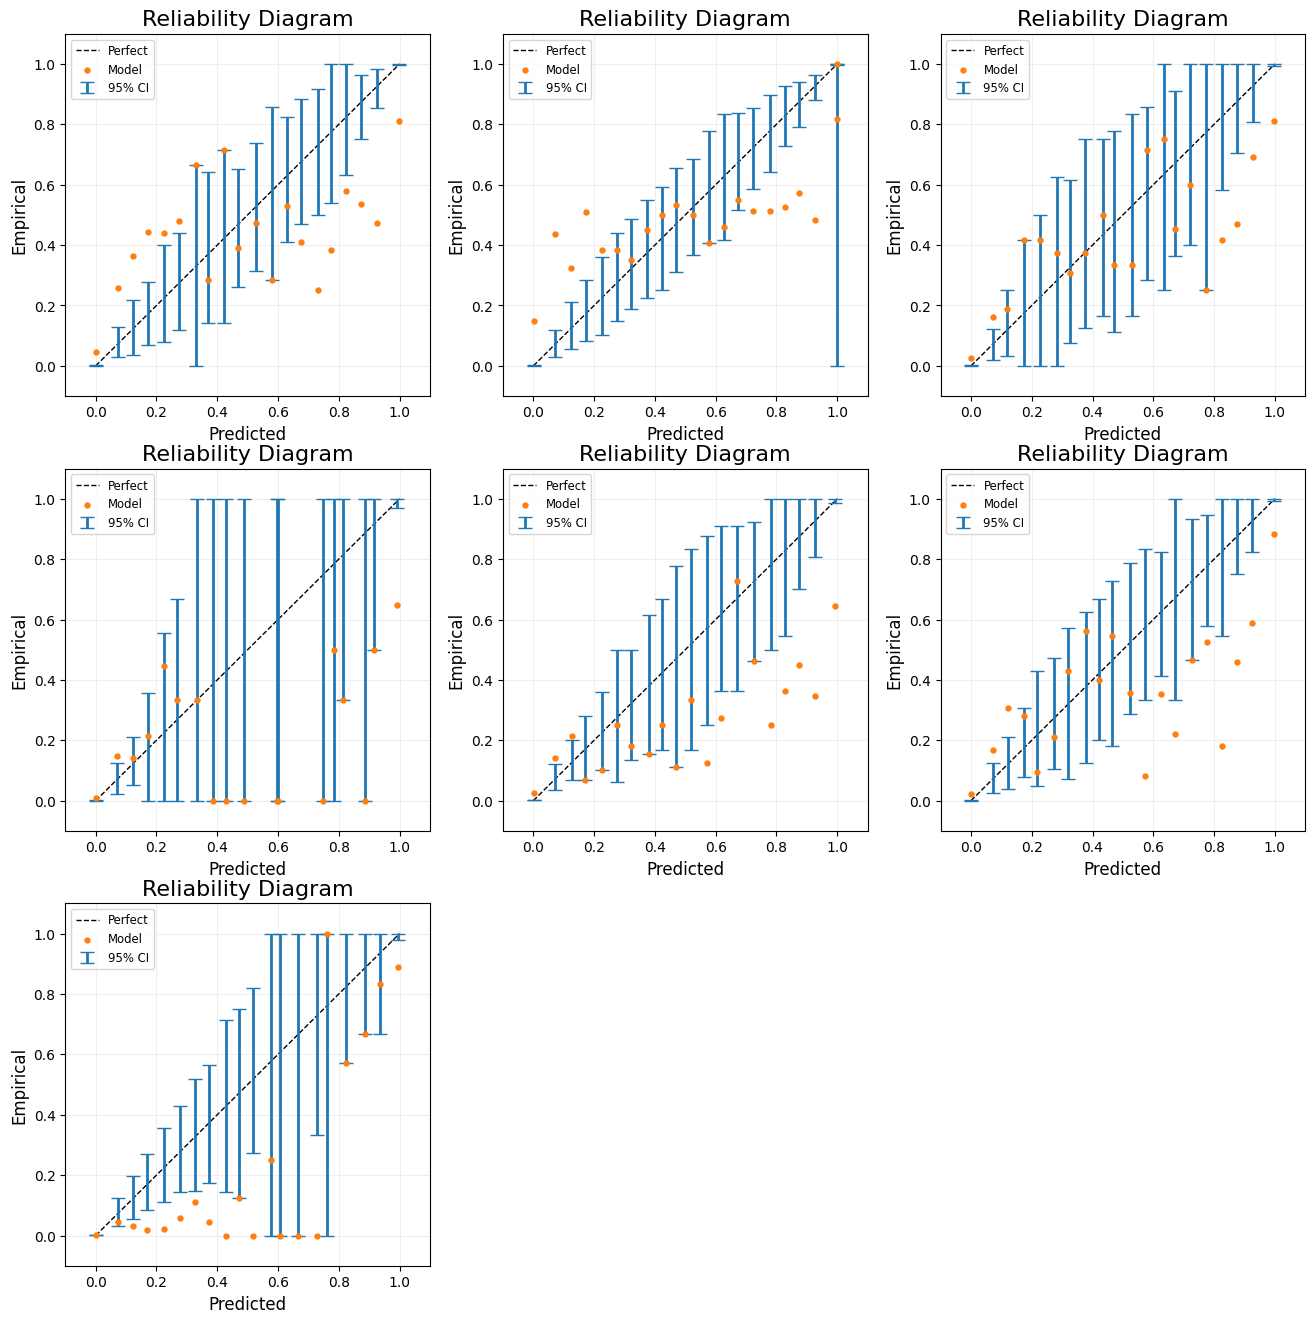

In [51]:
plot_diagram(d_probas, "webkb", "xfr")

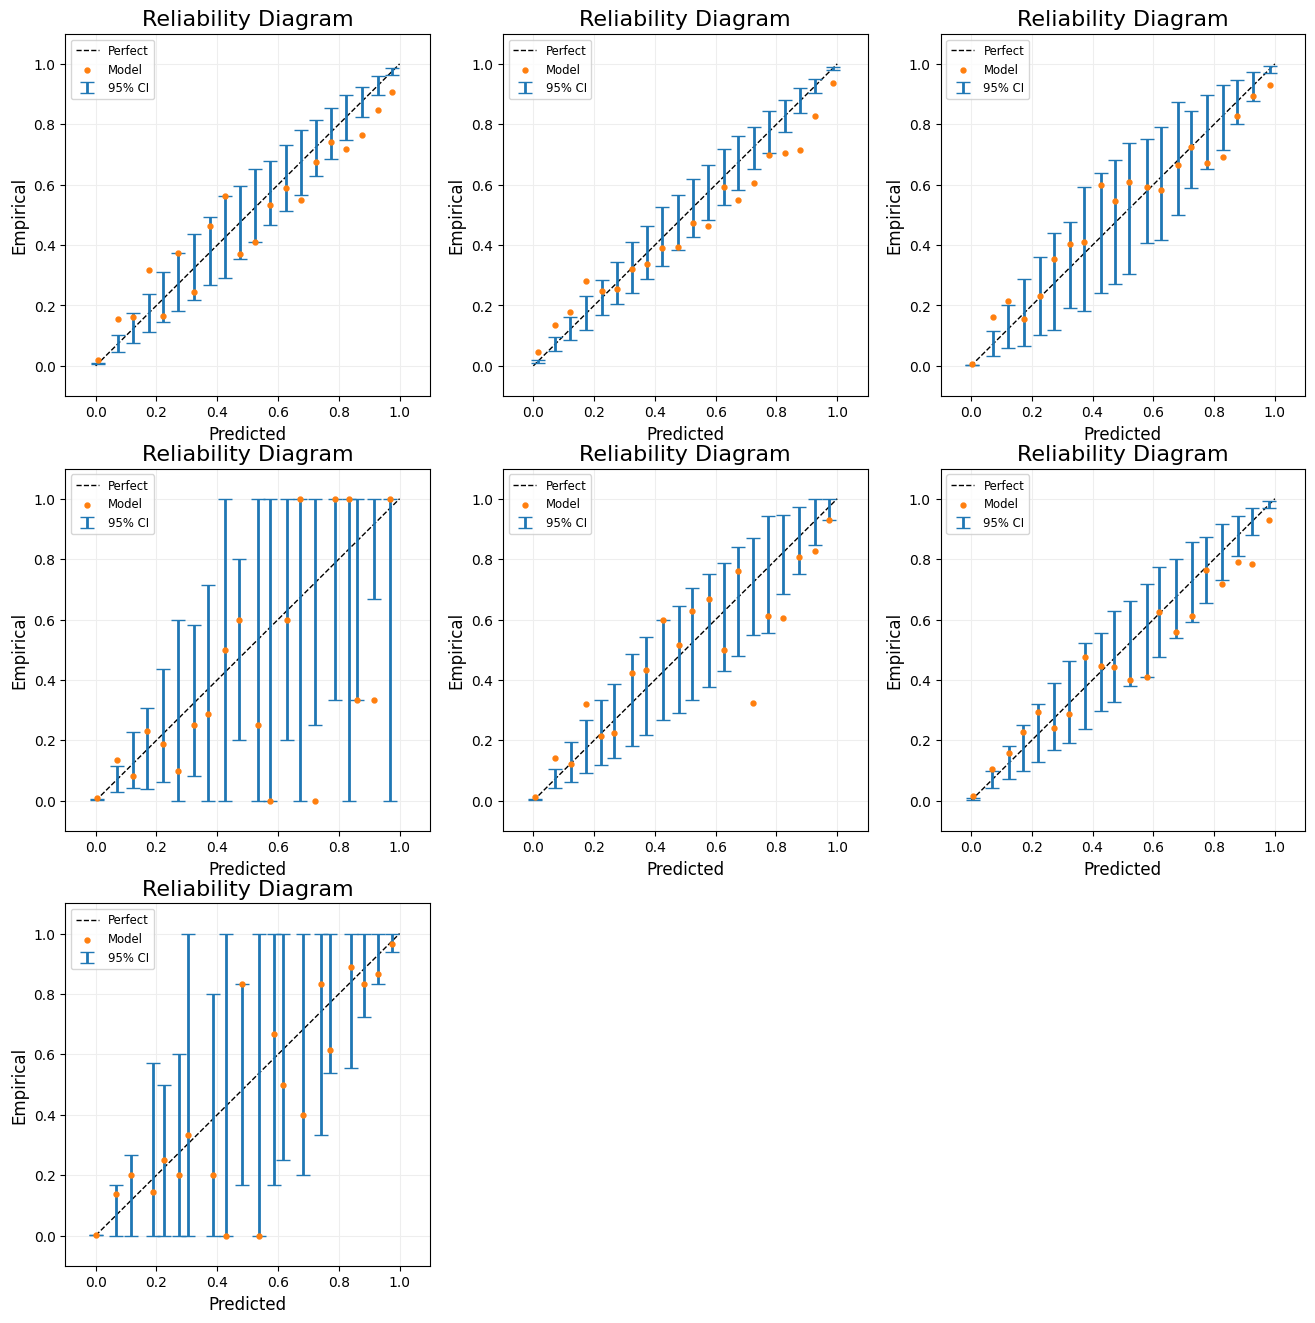

In [52]:
plot_diagram(d_probas, "webkb", "xtmk")